In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = 16,9

# Load Data

In [2]:
df_train = pd.read_csv('resources/train.csv', encoding='utf-8')
df_test = pd.read_csv('resources/test.csv', encoding='utf-8')

# Train a model

In [3]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor, plot_importance

In [4]:
df_train['area'] = df_train['area'].astype('category')
df_train['weekdaycat'] = df_train['weekdaycat'].astype('category')
df_train['hourcat'] = df_train['hourcat'].astype('category')

In [5]:
df_train_set, df_val_set = train_test_split(df_train, test_size=0.25, random_state=1989)

In [6]:
features = ['area', 'weekday', 'weekdaycat', 'hour', 'hourcat', 'cos604800', 'sin604800', 'cr_mean']

In [7]:
lgb = LGBMRegressor(n_estimators=10**4, max_depth=9, colsample_bytree=0.7, subsample=0.9, learning_rate=0.5)
lgb.fit(df_train_set[features], df_train_set['cr_gaus'], 
        eval_set=[(df_train_set[features], df_train_set['cr_gaus']), 
                  (df_val_set[features], df_val_set['cr_gaus'])], 
        verbose=100, early_stopping_rounds=10)

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's l2: 0.0225817	valid_1's l2: 0.0265083
Early stopping, best iteration is:
[110]	valid_0's l2: 0.022262	valid_1's l2: 0.0264239


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
       learning_rate=0.5, max_depth=9, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.9,
       subsample_for_bin=200000, subsample_freq=1)

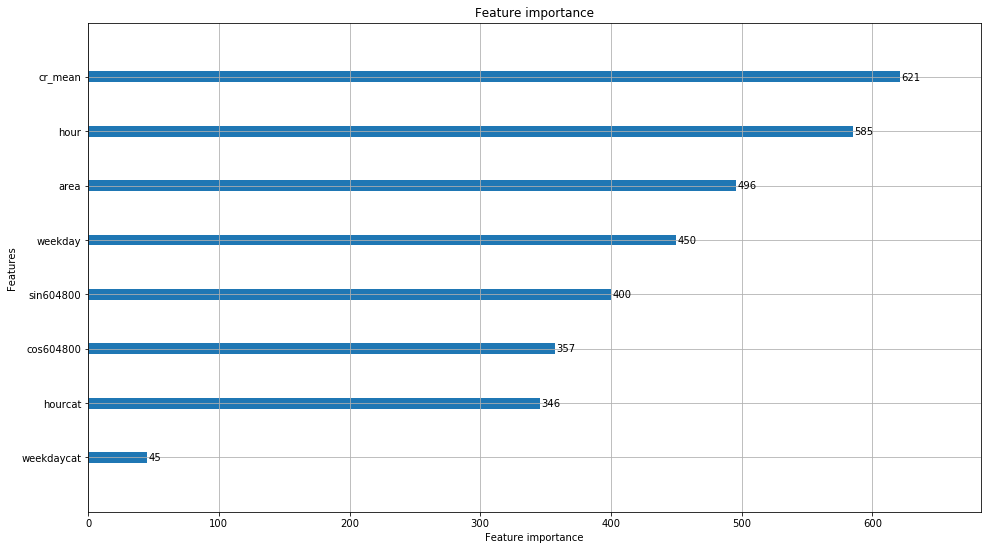

In [8]:
plot_importance(lgb)

# Save Model

In [9]:
from sklearn.externals import joblib

In [10]:
joblib.dump(lgb, 'resources/model.pkl')

['model.pkl']

# Predict

In [11]:
df_test['area'] = df_test['area'].astype(df_train['area'].dtype)
df_test['weekdaycat'] = df_test['weekdaycat'].astype(df_train['weekdaycat'].dtype)
df_test['hourcat'] = df_test['hourcat'].astype(df_train['hourcat'].dtype)

In [12]:
df_train['cr_pred'] = lgb.predict(df_train[features])
df_test['cr_pred'] = lgb.predict(df_test[features])

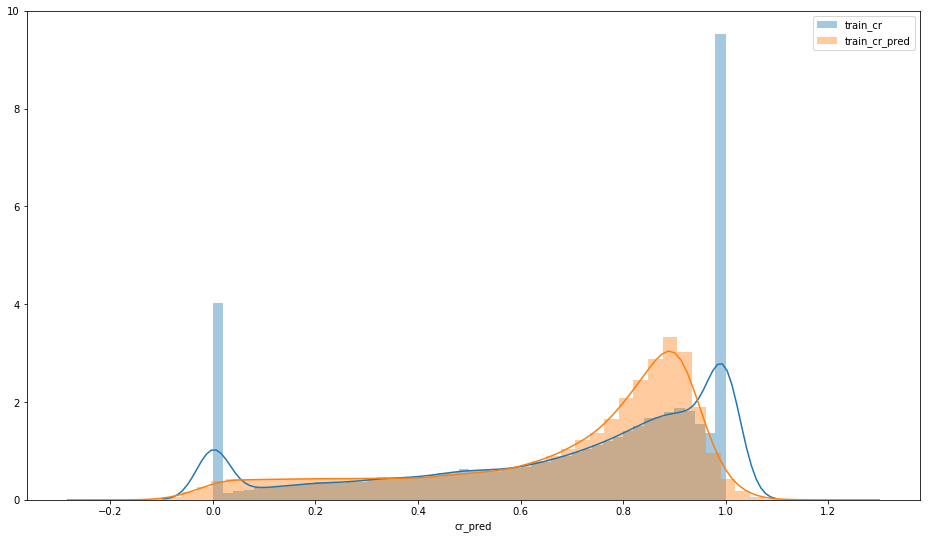

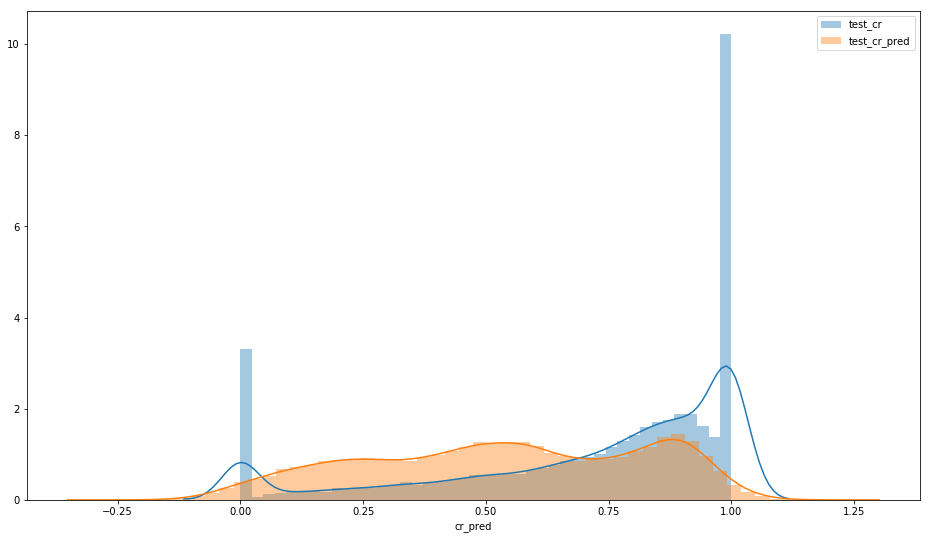

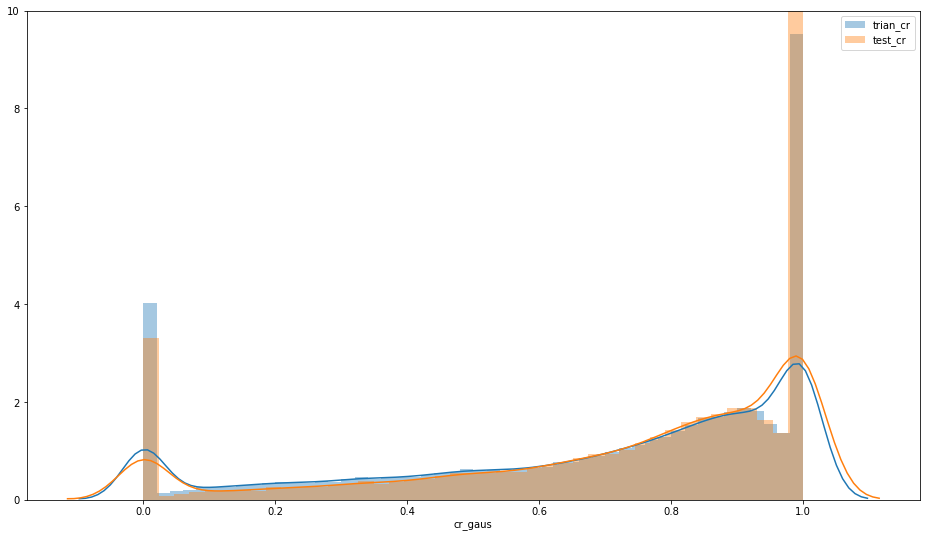

In [28]:
sns.distplot(df_train['cr_gaus'])
sns.distplot(df_train['cr_pred'])
plt.legend(['train_cr', 'train_cr_pred',])
plt.show()

sns.distplot(df_test['cr_gaus'])
sns.distplot(df_test['cr_pred'])
plt.legend(['test_cr', 'test_cr_pred'])
plt.show()


sns.distplot(df_train['cr_gaus'])
sns.distplot(df_test['cr_gaus'])
plt.legend(['trian_cr', 'test_cr'])
plt.show()

In [27]:
print(df_train['cr_gaus'] - df_train['cr_pred']).abs().mean()
print(df_test['cr_gaus'] - df_test['cr_pred']).abs().mean()

0.112486942877
0.30727150108
